In [1]:
import allel
import numpy as np
import pandas as pd
from functools import reduce
import os

## Picking features

In [577]:
# Overview of the types of data in each feature
for col in df_all_features.columns:
    try:
        print(f'{col}: {np.unique(df_all_features[col], return_counts=True)}')
    except:
        print(col)

CHROM: (array(['1', '2', '3', '4', '5'], dtype=object), array([371087, 380713, 294989, 340554, 267863]))
POS: (array([    10000,     10072,     10165, ..., 249240477, 249240539,
       249240606], dtype=int32), array([1, 1, 1, ..., 1, 1, 1]))
ID_freebayes
REF_freebayes
ALT_1_freebayes
ALT_2_freebayes
ALT_3_freebayes
QUAL_freebayes: (array([5.00000e+00, 5.10000e+00, 5.20000e+00, ..., 1.09016e+05,
       1.25618e+05,         nan], dtype=float32), array([    74,     91,     71, ...,      1,      1, 191064]))
AB_1_freebayes: (array([0.       , 0.0909091, 0.0952381, ..., 0.913043 , 0.916667 ,
             nan], dtype=float32), array([497296,      1,      1, ...,      2,      5, 311417]))
AB_2_freebayes: (array([nan], dtype=float32), array([1655206]))
AB_3_freebayes: (array([nan], dtype=float32), array([1655206]))
ABP_1_freebayes: (array([0.00000e+00, 3.01030e+00, 3.01337e+00, ..., 7.62065e+03,
       9.79258e+03,         nan], dtype=float32), array([497296,  18454,      1, ...,      1,     

AO_3_freebayes: (array([-1., nan]), array([1464142,  191064]))
CIGAR_1_freebayes
CIGAR_2_freebayes: (array([nan]), array([1655206]))
CIGAR_3_freebayes: (array([nan]), array([1655206]))
DECOMPOSED_freebayes: (array([False, nan, False, ..., nan, True, nan], dtype=object), array([    1,     1,   109, ...,     1, 38928,     1]))
DP_freebayes: (array([-1.0000e+00,  2.0000e+00,  3.0000e+00, ...,  1.2404e+04,
        1.3231e+04,         nan]), array([120353,     10,      8, ...,      1,      1, 191064]))
DPB_freebayes: (array([2.0000e+00, 3.0000e+00, 4.0000e+00, ..., 1.2404e+04, 1.3231e+04,
              nan], dtype=float32), array([    10,      8,     91, ...,      1,      1, 311417]))
DPRA_1_freebayes: (array([ 0.      ,  0.125   ,  0.147059,  0.150943,  0.153846,  0.157895,
        0.172414,  0.186047,  0.204545,  0.206897,  0.214286,  0.217391,
        0.223529,  0.234043,  0.263158,  0.266667,  0.271186,  0.272727,
        0.27451 ,  0.298701,  0.3     ,  0.304348,  0.310606,  0.3125  ,


DPRA_3_freebayes: (array([nan], dtype=float32), array([1655206]))
END_freebayes: (array([-1., nan]), array([1464142,  191064]))
EPP_1_freebayes: (array([3.01030e+00, 3.01259e+00, 3.01313e+00, ..., 1.12691e+04,
       1.23762e+04,         nan], dtype=float32), array([ 50237,      1,      1, ...,      1,      1, 311417]))
EPP_2_freebayes: (array([nan], dtype=float32), array([1655206]))
EPP_3_freebayes: (array([nan], dtype=float32), array([1655206]))
EPPR_freebayes: (array([   0.    ,    3.0103,    3.0124, ..., 1724.48  , 2568.23  ,
             nan], dtype=float32), array([432406,  39550,      1, ...,      1,      1, 311417]))
GTI_freebayes: (array([-1.,  0.,  1.,  2., nan]), array([ 120353, 1337971,    5798,      20,  191064]))
LEN_1_freebayes: (array([ 1., nan]), array([1464142,  191064]))
LEN_2_freebayes: (array([-1.,  1., nan]), array([1463120,    1022,  191064]))
LEN_3_freebayes: (array([-1.,  1., nan]), array([1464136,       6,  191064]))
MEANALT_1_freebayes: (array([1. , 1.5, 2. ,

RPL_3_freebayes: (array([nan], dtype=float32), array([1655206]))
RPP_1_freebayes: (array([3.01030e+00, 3.01342e+00, 3.01346e+00, ..., 1.24455e+04,
       1.50839e+04,         nan], dtype=float32), array([ 49574,      1,      1, ...,      1,      1, 311417]))
RPP_2_freebayes: (array([nan], dtype=float32), array([1655206]))
RPP_3_freebayes: (array([nan], dtype=float32), array([1655206]))
RPPR_freebayes: (array([0.00000e+00, 3.01030e+00, 3.01286e+00, ..., 5.83130e+03,
       1.24047e+04,         nan], dtype=float32), array([432406,  39062,      1, ...,      1,      1, 311417]))
RPR_1_freebayes: (array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e

RUN_1_freebayes: (array([-1.,  1., nan]), array([ 120353, 1343789,  191064]))
RUN_2_freebayes: (array([-1., nan]), array([1464142,  191064]))
RUN_3_freebayes: (array([-1., nan]), array([1464142,  191064]))
SAF_1_freebayes: (array([-1.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
        4.000e+00,  5.000e+00,  6.000e+00,  7.000e+00,  8.000e+00,
        9.000e+00,  1.000e+01,  1.100e+01,  1.200e+01,  1.300e+01,
        1.400e+01,  1.500e+01,  1.600e+01,  1.700e+01,  1.800e+01,
        1.900e+01,  2.000e+01,  2.100e+01,  2.200e+01,  2.300e+01,
        2.400e+01,  2.500e+01,  2.600e+01,  2.700e+01,  2.800e+01,
        2.900e+01,  3.000e+01,  3.100e+01,  3.200e+01,  3.300e+01,
        3.400e+01,  3.500e+01,  3.600e+01,  3.700e+01,  3.800e+01,
        3.900e+01,  4.000e+01,  4.100e+01,  4.200e+01,  4.300e+01,
        4.400e+01,  4.500e+01,  4.600e+01,  4.700e+01,  4.800e+01,
        4.900e+01,  5.000e+01,  5.100e+01,  5.200e+01,  5.300e+01,
        5.400e+01,  5.500e+01,  5.600e+

SAF_2_freebayes: (array([-1., nan]), array([1464142,  191064]))
SAF_3_freebayes: (array([-1., nan]), array([1464142,  191064]))
SAP_1_freebayes: (array([3.01030e+00, 3.01261e+00, 3.01335e+00, ..., 1.23848e+04,
       1.26952e+04,         nan], dtype=float32), array([ 43930,      1,      1, ...,      1,      1, 311417]))
SAP_2_freebayes: (array([nan], dtype=float32), array([1655206]))
SAP_3_freebayes: (array([nan], dtype=float32), array([1655206]))
SAR_1_freebayes: (array([-1.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
        4.000e+00,  5.000e+00,  6.000e+00,  7.000e+00,  8.000e+00,
        9.000e+00,  1.000e+01,  1.100e+01,  1.200e+01,  1.300e+01,
        1.400e+01,  1.500e+01,  1.600e+01,  1.700e+01,  1.800e+01,
        1.900e+01,  2.000e+01,  2.100e+01,  2.200e+01,  2.300e+01,
        2.400e+01,  2.500e+01,  2.600e+01,  2.700e+01,  2.800e+01,
        2.900e+01,  3.000e+01,  3.100e+01,  3.200e+01,  3.300e+01,
        3.400e+01,  3.500e+01,  3.600e+01,  3.700e+01,  3.800

SAR_2_freebayes: (array([-1., nan]), array([1464142,  191064]))
SAR_3_freebayes: (array([-1., nan]), array([1464142,  191064]))
SOMATIC_freebayes: (array([False, nan, False, ..., False, True, nan], dtype=object), array([ 275594,       1,  138018, ..., 1032646,    2143,       1]))
SRF_freebayes: (array([-1.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
        4.000e+00,  5.000e+00,  6.000e+00,  7.000e+00,  8.000e+00,
        9.000e+00,  1.000e+01,  1.100e+01,  1.200e+01,  1.300e+01,
        1.400e+01,  1.500e+01,  1.600e+01,  1.700e+01,  1.800e+01,
        1.900e+01,  2.000e+01,  2.100e+01,  2.200e+01,  2.300e+01,
        2.400e+01,  2.500e+01,  2.600e+01,  2.700e+01,  2.800e+01,
        2.900e+01,  3.000e+01,  3.100e+01,  3.200e+01,  3.300e+01,
        3.400e+01,  3.500e+01,  3.600e+01,  3.700e+01,  3.800e+01,
        3.900e+01,  4.000e+01,  4.100e+01,  4.200e+01,  4.300e+01,
        4.400e+01,  4.500e+01,  4.600e+01,  4.700e+01,  4.800e+01,
        4.900e+01,  5.000e+01,  5

SRP_freebayes: (array([   0.     ,    3.0103 ,    3.01221, ..., 1700.95   , 2450.01   ,
              nan], dtype=float32), array([432406,  35357,      1, ...,      1,      1, 311417]))
SRR_freebayes: (array([-1.000e+00,  0.000e+00,  1.000e+00,  2.000e+00,  3.000e+00,
        4.000e+00,  5.000e+00,  6.000e+00,  7.000e+00,  8.000e+00,
        9.000e+00,  1.000e+01,  1.100e+01,  1.200e+01,  1.300e+01,
        1.400e+01,  1.500e+01,  1.600e+01,  1.700e+01,  1.800e+01,
        1.900e+01,  2.000e+01,  2.100e+01,  2.200e+01,  2.300e+01,
        2.400e+01,  2.500e+01,  2.600e+01,  2.700e+01,  2.800e+01,
        2.900e+01,  3.000e+01,  3.100e+01,  3.200e+01,  3.300e+01,
        3.400e+01,  3.500e+01,  3.600e+01,  3.700e+01,  3.800e+01,
        3.900e+01,  4.000e+01,  4.100e+01,  4.200e+01,  4.300e+01,
        4.400e+01,  4.500e+01,  4.600e+01,  4.700e+01,  4.800e+01,
        4.900e+01,  5.000e+01,  5.100e+01,  5.200e+01,  5.300e+01,
        5.400e+01,  5.500e+01,  5.600e+01,  5.700e+01,  5.800

TYPE_1_freebayes
TYPE_2_freebayes
TYPE_3_freebayes
technology.illumina_1_freebayes: (array([ 1., nan], dtype=float32), array([1343789,  311417]))
technology.illumina_2_freebayes: (array([nan], dtype=float32), array([1655206]))
technology.illumina_3_freebayes: (array([nan], dtype=float32), array([1655206]))
ANN_freebayes
LOF_freebayes
NMD_freebayes
FILTER_PASS_freebayes: (array([False, nan, False, ..., False, True, nan], dtype=object), array([ 276178,       1,  137359, ..., 1031903,    2998,       1]))
FILTER_REJECT_freebayes: (array([False, True, nan, ..., nan, True, nan], dtype=object), array([  3003, 412010,      1, ...,      1, 274780,      1]))
FILTER_FBQualDepth_freebayes: (array([False, nan, False, ..., False, True, nan], dtype=object), array([ 275882,       1,  137904, ..., 1034380,     148,       1]))
numalt_freebayes: (array([ 1.,  2.,  3., nan]), array([1463120,    1016,       6,  191064]))
altlen_1_freebayes: (array([ 0., nan]), array([1464142,  191064]))
altlen_2_freebayes:

MQ0_mutect2: (array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.3725e+04, 1.3775e+04,
              nan]), array([  14127,    4023,    2742, ...,       1,       1, 1605795]))
MQRankSum_mutect2: (array([-33.788, -30.517, -29.854, ...,   8.075,   8.776,     nan],
      dtype=float32), array([      1,       1,       1, ...,       1,       1, 1605802]))
NLOD_mutect2
PON_mutect2: (array([nan]), array([1655206]))
QD_mutect2: (array([nan], dtype=float32), array([1655206]))
ReadPosRankSum_mutect2: (array([-24.147, -23.522, -20.166, ...,  22.291,  23.053,     nan],
      dtype=float32), array([      1,       1,       1, ...,       1,       1, 1606038]))
TLOD_mutect2
ANN_mutect2
LOF_mutect2
NMD_mutect2
FILTER_PASS_mutect2: (array([nan, nan, nan, ..., nan, nan, nan], dtype=object), array([1, 1, 1, ..., 1, 1, 1]))
FILTER_MinAF_mutect2: (array([nan, nan, nan, ..., nan, nan, nan], dtype=object), array([1, 1, 1, ..., 1, 1, 1]))
FILTER_alt_allele_in_normal_mutect2: (array([nan, nan, nan, ..., nan, nan

AF_1_vardict: (array([0.    , 0.0032, 0.0036, ..., 0.9989, 1.    ,    nan], dtype=float32), array([  7039,      1,      1, ...,      1, 425996, 191987]))
AF_2_vardict: (array([nan], dtype=float32), array([1655206]))
AF_3_vardict: (array([nan], dtype=float32), array([1655206]))
DP_vardict: (array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5

END_vardict: (array([-1., nan]), array([1463219,  191987]))
LSEQ_vardict
MSI_vardict: (array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       55., 58., nan], dtype=float32), array([621615, 507806, 179178,  71714,  30707,  15027,   8469,   5199,
         3602,   2799,   2280,   1920,   1561,   1353,   1239,   1715,
         1055,    822,    702,    644,    569,    546,    441,    450,
          343,    261,    202,    164,    135,    121,     82,     98,
           74,     40,     44,     34,     36,     33,     42,     18,
           19,      7,     12,      5,      5,     14,      3,      3,
            3,      3,      1,      2,      1,      1, 191987]))
MSILEN_vardict: (array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., nan], dtype=float32), array([12

ANN_vardict
LOF_vardict
NMD_vardict
FILTER_PASS_vardict: (array([False, nan, nan, ..., nan, True, nan], dtype=object), array([34,  1,  1, ...,  1, 15,  1]))
FILTER_Bias_vardict: (array([False, nan, False, ..., nan, True, nan], dtype=object), array([121,   1, 100, ...,   1,   4,   1]))
FILTER_Cluster0bp_vardict: (array([False, nan, False, ..., nan, False, nan], dtype=object), array([59,  1, 33, ...,  1,  4,  1]))
FILTER_DIFF0.2_vardict: (array([False, nan, False, ..., nan, False, nan], dtype=object), array([59,  1, 33, ...,  1,  4,  1]))
FILTER_InDelLikely_vardict: (array([False, nan, False, ..., nan, False, nan], dtype=object), array([59,  1, 33, ...,  1,  4,  1]))
FILTER_InGap_vardict: (array([False, nan, False, ..., nan, False, nan], dtype=object), array([59,  1, 33, ...,  1,  4,  1]))
FILTER_InIns_vardict: (array([False, nan, False, ..., nan, False, nan], dtype=object), array([59,  1, 33, ...,  1,  4,  1]))
FILTER_LongAT_vardict: (array([False, nan, False, ..., nan, False, nan], dty

ANN_varscan
LOF_varscan
NMD_varscan
FILTER_PASS_varscan: (array([False, nan, nan, ..., True, nan, True], dtype=object), array([257,   1,   1, ...,   9,   1, 153]))
FILTER_REJECT_varscan: (array([False, nan, False, ..., True, nan, True], dtype=object), array([430,   1,  72, ...,  60,   1,  13]))
FILTER_SpvFreq_varscan: (array([False, nan, False, ..., True, nan, True], dtype=object), array([ 7,  1,  2, ..., 67,  1, 52]))
FILTER_indelError_varscan: (array([False, nan, False, ..., nan, nan, False], dtype=object), array([59,  1, 83, ...,  1,  1,  5]))
FILTER_str10_varscan: (array([False, nan, False, ..., nan, nan, False], dtype=object), array([59,  1, 83, ...,  1,  1,  5]))
numalt_varscan: (array([ 1., nan]), array([1509846,  145360]))
altlen_1_varscan: (array([ 0., nan]), array([1509846,  145360]))
altlen_2_varscan: (array([ 0., nan]), array([1509846,  145360]))
altlen_3_varscan: (array([ 0., nan]), array([1509846,  145360]))
is_snp_varscan: (array([True, nan, True, ..., nan, nan, True], d

## Parsing functions

In [2]:
def parse_to_df(folder, features):
    
    # Parse VCF files to DataFrames
    algos = ['freebayes', 'mutect2', 'vardict', 'varscan']
    if folder == 'test':
        dfs = [allel.vcf_to_dataframe(f'{folder}/{i}.vcf.gz', fields=features[i]) for i in algos]
    elif 'real2_part1' in folder:
        dfs = [allel.vcf_to_dataframe(f'{folder}/real2_{i}_chr1to5.vcf.gz', fields=features[i]) for i in algos]
    else:
        dfs = [allel.vcf_to_dataframe(f'{folder}/{folder.split(os.path.sep)[-1]}-{i}.vcf.gz', fields=features[i]) for i in algos]
    algo_dicts = dict(zip(algos, dfs)) # a dictionary of key = algo, value = algo results
    
    # Rename columns
    keep_same = {'CHROM', 'POS'}
    for i in algos:
        algo_dicts[i] = algo_dicts[i][algo_dicts[i]['is_snp']] # obtain only SNPs
        algo_dicts[i].columns = ['{}{}'.format(c, '' if c in keep_same else '_' + i) for c in algo_dicts[i].columns]
        
    # Merge DataFrames from diff algos
    edited_dfs = [algo_dicts[i] for i in algos]
    merged = reduce(lambda left, right: pd.merge(left, right, on =['CHROM', 'POS'],
                                                how = 'outer'), edited_dfs)
    
    
    return merged

## To read desired features from csv or array

### csv

In [250]:
poss_features = pd.read_csv('features.csv')
poss_features.drop(columns=['real2-2 values','Definition'], inplace=True)
poss_features = poss_features[:245]
poss_features

,Algorithm,Feature,Decision
0,freebayes,CHROM,1.0
1,freebayes,POS,1.0
2,freebayes,ID,1.0
3,freebayes,REF,1.0
4,freebayes,ALT_1,1.0
...,...,...,...
240,varscan,numalt,0.0
241,varscan,altlen_1,0.0
242,varscan,altlen_2,0.0
243,varscan,altlen_3,0.0


In [251]:
target_features = {'freebayes':[],'mutect2':[],'vardict':[],'varscan':[]}

for i in range(poss_features.shape[0]):
    alg,feature,decision = poss_features.iloc[i]
    if decision not in [0,2]:
        target_features[alg].append(feature)
    
num_features = 0
for feature in target_features:
    num_features += len(target_features[feature])
    print(target_features[feature])
    print()
print(f'Total features: {num_features - 6}') # -6 for the repeats of 'CHROM' and 'POS'

['CHROM', 'POS', 'ID', 'REF', 'ALT_1', 'ALT_2', 'ALT_3', 'QUAL', 'AB_1', 'ABP_1', 'AC_1', 'AC_2', 'AC_3', 'AF_1', 'AF_2', 'AF_3', 'AN', 'AO_1', 'DP', 'DPB', 'DPRA_1', 'EPP_1', 'EPPR', 'GTI', 'MEANALT_1', 'MQM_1', 'MQMR', 'NUMALT', 'ODDS', 'PAIRED_1', 'PAIREDR', 'QA_1', 'QR', 'RO', 'RPL_1', 'RPP_1', 'RPPR', 'RPR_1', 'RUN_1', 'SAF_1', 'SAP_1', 'SAR_1', 'SOMATIC', 'SRF', 'SRP', 'SRR', 'ANN', 'FILTER_PASS', 'FILTER_REJECT', 'FILTER_FBQualDepth', 'numalt', 'is_snp']

['CHROM', 'POS', 'ID', 'REF', 'ALT_1', 'ClippingRankSum', 'DP', 'ECNT', 'FS', 'HCNT', 'MAX_ED', 'MIN_ED', 'MQ', 'MQ0', 'MQRankSum', 'NLOD', 'ReadPosRankSum', 'TLOD', 'ANN', 'FILTER_PASS', 'FILTER_clustered_events', 'FILTER_germline_risk', 'FILTER_homologous_mapping_event', 'FILTER_multi_event_alt_allele_in_normal', 'FILTER_t_lod_fstar', 'FILTER_triallelic_site', 'is_snp']

['CHROM', 'POS', 'ID', 'REF', 'ALT_1', 'QUAL', 'AF_1', 'DP', 'LSEQ', 'MSI', 'MSILEN', 'RSEQ', 'SHIFT3', 'SOMATIC', 'SOR', 'SSF', 'STATUS', 'VD', 'ANN', 'FILT

In [252]:
final_target_features = {'freebayes': ['SOMATIC','QUAL','ID','RO','QR','DPB','CHROM','POS',
  'is_snp'],
 'mutect2': ['FILTER_PASS','ID','ECNT','MQ','HCNT','DP','CHROM','POS','is_snp',],
 'vardict': ['FILTER_PASS','STATUS','ID','SSF','VD','CHROM','POS','is_snp'],
 'varscan': ['SOMATIC', 'ID', 'SPV', 'FILTER_PASS', 'CHROM', 'POS', 'is_snp']}

### array

In [535]:
features_to_test = ['REF_vardict',
       'DP_varscan', 'QUAL_vardict', 'ANN_varscan', 'REF_mutect2',
       'REF_varscan', 'REF_freebayes']

target_features = {'freebayes':[],'mutect2':[],'vardict':[],'varscan':[]}

for alg,features in target_features.items():
    features += ['CHROM','POS','is_snp']

for f in features_to_test:
    parts = f.split("_")
    alg = parts[-1]
    feature = parts[0]
    for i in range(1,-1):
        feature = feature + parts[i]
    target_features[alg].append(feature)
    
for alg,features in target_features.items():
    print(alg, features)

freebayes ['CHROM', 'POS', 'is_snp', 'REF']
mutect2 ['CHROM', 'POS', 'is_snp', 'REF']
vardict ['CHROM', 'POS', 'is_snp', 'REF', 'QUAL']
varscan ['CHROM', 'POS', 'is_snp', 'DP', 'ANN', 'REF']


## actually parse stuff

In [3]:
# parse all features

all_features = dict({'freebayes':'*','mutect2':'*','varscan':'*','vardict':'*'})

target_folder = '/Volumes/Samsung_T5/4220 proj/real2_part2'
df_real2p2 = parse_to_df(folder=target_folder, features=all_features)

In [174]:
# parse target features

target_folder = '/Volumes/Samsung_T5/4220 proj/real1'
df = parse_to_df(folder=target_folder, features=final_target_features)

## Gradient Boosting Decision Trees 

In [7]:
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt 
import seaborn as sns

## Changing False True to 0 1 and corresponding column types

In [209]:
replace_dict = dict({'FALSE':0, 'TRUE':1, 'False':0, 'True': 1})
df_new2 = df_new.replace(to_replace=replace_dict)

In [210]:
for col in df_new2.columns:
    print(col, df_new2[col].dtype)

SOMATIC_freebayes object
QUAL_freebayes float32
QR_freebayes float64
DPB_freebayes float32
CHROM object
POS int32
is_snp_freebayes object
FILTER_PASS_mutect2 object
ECNT_mutect2 object
MQ_mutect2 float32
FILTER_t_lod_fstar_mutect2 object
HCNT_mutect2 object
DP_mutect2 float64
is_snp_mutect2 object
FILTER_PASS_vardict object
STATUS_vardict object
SSF_vardict float32
VD_vardict float64
SOMATIC_vardict object
is_snp_vardict object
SOMATIC_varscan object
SPV_varscan float32
FILTER_PASS_varscan object
is_snp_varscan object
ID_binary_freebayes bool
ID_binary_mutect2 bool
ID_binary_vardict bool
ID_binary_varscan bool


In [211]:
for col in df_new2.columns:
    if df_new2[col].dtype == 'O':
        if ('FILTER' in col) or ('SOMATIC' in col):
            df_new2[col] = df_new2[col].astype('bool')
        else:
            print(col)

CHROM
is_snp_freebayes
ECNT_mutect2
HCNT_mutect2
is_snp_mutect2
STATUS_vardict
is_snp_vardict
is_snp_varscan


In [214]:
for col in df_new2.columns:
    if df_new2[col].dtype == 'O':
        if 'CNT' in col:
            df_new2[col] = df_new2[col].astype('Int64')

In [215]:
# Checking work

for col in df_new2.columns:
    print(col, df_new2[col].dtype)

SOMATIC_freebayes bool
QUAL_freebayes float32
QR_freebayes float64
DPB_freebayes float32
CHROM object
POS int32
is_snp_freebayes object
FILTER_PASS_mutect2 bool
ECNT_mutect2 Int64
MQ_mutect2 float32
FILTER_t_lod_fstar_mutect2 bool
HCNT_mutect2 Int64
DP_mutect2 float64
is_snp_mutect2 object
FILTER_PASS_vardict bool
STATUS_vardict object
SSF_vardict float32
VD_vardict float64
SOMATIC_vardict bool
is_snp_vardict object
SOMATIC_varscan bool
SPV_varscan float32
FILTER_PASS_varscan bool
is_snp_varscan object
ID_binary_freebayes bool
ID_binary_mutect2 bool
ID_binary_vardict bool
ID_binary_varscan bool


In [217]:
algos = ['freebayes', 'mutect2', 'vardict', 'varscan']
df_new2.drop([f'is_snp_{algo}' for algo in algos], axis=1, inplace=True)

# Ok actually testing now

In [175]:
## function to get y labels
# path_to_truth = '/Volumes/Samsung_T5/4220 proj/real2_part1/real2_truth_chr1to5.bed'
path_to_truth = '/Volumes/Samsung_T5/4220 proj/real1/real1_truth.bed'

truth_labels = pd.read_csv(path_to_truth, sep = "\t", names = ['Chromo', 'start', 'end'])
print(list(set(truth_labels.start == truth_labels.end) )) # the start and end position are the same 
truth_labels = truth_labels[['Chromo', 'start']]
truth_labels['truth'] = 1
sub_truth= truth_labels.rename(columns = {'Chromo':'CHROM', 'start':'POS'})

[True]


In [176]:
algos = ['freebayes', 'mutect2', 'vardict', 'varscan']

for alg in algos:
    id_var = f'ID_{alg}'
    new_id = f'ID_binary_{alg}'
    df[new_id] = df[id_var] != '.'

In [143]:
df_old = df.drop(columns=[f'ID_binary_{alg}' for alg in algos])
df_new = df.drop(columns=[f'ID_{alg}' for alg in algos])

In [177]:
print('df_old')
print(sorted(df_old.columns))
print()
print('df_new')
print(sorted(df_new.columns))

df_old
['CHROM', 'DPB_freebayes', 'DP_mutect2', 'ECNT_mutect2', 'FILTER_PASS_mutect2', 'FILTER_PASS_vardict', 'FILTER_PASS_varscan', 'FILTER_t_lod_fstar_mutect2', 'HCNT_mutect2', 'ID_freebayes', 'ID_mutect2', 'ID_vardict', 'ID_varscan', 'MQ_mutect2', 'POS', 'QR_freebayes', 'QUAL_freebayes', 'SOMATIC_freebayes', 'SOMATIC_vardict', 'SOMATIC_varscan', 'SPV_varscan', 'SSF_vardict', 'STATUS_vardict', 'VD_vardict', 'is_snp_freebayes', 'is_snp_mutect2', 'is_snp_vardict', 'is_snp_varscan']

df_new
['CHROM', 'DPB_freebayes', 'DP_mutect2', 'ECNT_mutect2', 'FILTER_PASS_mutect2', 'FILTER_PASS_vardict', 'FILTER_PASS_varscan', 'FILTER_t_lod_fstar_mutect2', 'HCNT_mutect2', 'ID_binary_freebayes', 'ID_binary_mutect2', 'ID_binary_vardict', 'ID_binary_varscan', 'MQ_mutect2', 'POS', 'QR_freebayes', 'QUAL_freebayes', 'SOMATIC_freebayes', 'SOMATIC_vardict', 'SOMATIC_varscan', 'SPV_varscan', 'SSF_vardict', 'STATUS_vardict', 'VD_vardict', 'is_snp_freebayes', 'is_snp_mutect2', 'is_snp_vardict', 'is_snp_varscan

In [178]:
# OLD combine dataset with truth labels
combined_old = df_old.merge(sub_truth, on=['CHROM','POS'], how='outer')
combined_old['truth'].fillna(0, inplace=True)
# demarcate X and y
X_old = combined_old[combined_old.columns[~combined_old.columns.isin(['truth','POS','CHROM'])]]
y_old = combined_old['truth'] 

In [179]:
# NEW combine dataset with truth labels
combined_new = df_new.merge(sub_truth, on=['CHROM','POS'], how='outer')
combined_new['truth'].fillna(0, inplace=True)
# demarcate X and y
X_new = combined_new[combined_new.columns[~combined_new.columns.isin(['truth','POS','CHROM'])]]
y_new = combined_new['truth'] 

In [219]:
# NEW2 combine dataset with truth labels
combined_new2 = df_new2.merge(sub_truth, on=['CHROM','POS'], how='outer')
combined_new2['truth'].fillna(0, inplace=True)
# demarcate X and y
X_new2 = combined_new2[combined_new2.columns[~combined_new2.columns.isin(['truth','POS','CHROM'])]]
y_new2 = combined_new2['truth'] 

In [233]:
for col in X_new2.columns:
    if X_new2[col].dtype == 'O':
        if ('FILTER' in col) or ('SOMATIC' in col):
            X_new2[col] = X_new2[col].astype('bool')
        else:
            print(col)

/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/1849755986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new2[col] = X_new2[col].astype('bool')


STATUS_vardict
ID_binary_freebayes
ID_binary_mutect2
ID_binary_vardict
ID_binary_varscan


In [234]:
for col in X_new2.columns:
    if X_new2[col].dtype == 'O':
        if ('ID' in col):
            X_new2[col] = X_new2[col].astype('bool')
        else:
            print(col)

STATUS_vardict


/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/2801417263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new2[col] = X_new2[col].astype('bool')


In [237]:
X_new2['STATUS_vardict'] = X_new2['STATUS_vardict'].astype('category')

/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/2308776003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new2['STATUS_vardict'] = X_new2['STATUS_vardict'].astype('category')


In [146]:
# combine dataset with truth labels
combined = df.merge(sub_truth, on=['CHROM','POS'], how='outer')
combined['truth'].fillna(0, inplace=True)
# demarcate X and y
X = combined[combined.columns[~combined.columns.isin(['truth','POS','CHROM'])]]
y = combined['truth'] 

In [180]:
# NEW
for col in X_new.columns:
    if X_new[col].dtype == 'O':
        X_new[col] = X_new[col].astype('category')

/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/546720793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[col] = X_new[col].astype('category')
/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/546720793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[col] = X_new[col].astype('category')
/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/546720793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [13]:
# replace infinity values
X['SOR_vardict'] = X['SOR_vardict'].replace(to_replace=np.inf, value=np.finfo(np.float64).max, inplace=True)

/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/3596117702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SOR_vardict'] = X['SOR_vardict'].replace(to_replace=np.inf, value=np.finfo(np.float64).max, inplace=True)
/var/folders/pq/bv6ltt715h9_xqr2m38t82_80000gn/T/ipykernel_35410/3596117702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SOR_vardict'] = X['SOR_vardict'].replace(to_replace=np.inf, value=np.finfo(np.float64).max, inplace=True)


In [11]:
# ordinal encoding for REF and ALT
enc = OrdinalEncoder()

In [181]:
enc.fit(X_old)
X_old_transform = enc.transform(X_old)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

### Lets do multiple iterations of train & test !!!!

In [227]:
# OLD

i = 4

X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old_transform, y_old, test_size=.4, random_state=i)
model_old = XGBClassifier(eval_metric='logloss')
model_old.fit(X_train_old,y_train_old)
y_pred_old = model_old.predict(X_test_old)
# evaluate model performance for syn5 dataset with 126 features
print(f'Iteration {i}')
print(f'Precision score: {precision_score(y_test_old,y_pred_old)}')
print(f'Recall score: {recall_score(y_test_old,y_pred_old)}')
print(f'F1 score: {f1_score(y_test_old,y_pred_old)}')

Iteration 4
Precision score: 0.907843137254902
Recall score: 0.8670411985018727
F1 score: 0.8869731800766284


In [228]:
# NEW

i = 4

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=.4, random_state=i)
model_new = XGBClassifier(eval_metric='logloss',enable_categorical=True,tree_method='approx')
model_new.fit(X_train_new,y_train_new)
y_pred_new = model_new.predict(X_test_new)
# evaluate model performance for syn5 dataset with 126 features
print(f'Iteration {i}')
print(f'Precision score: {precision_score(y_test_new,y_pred_new)}')
print(f'Recall score: {recall_score(y_test_new,y_pred_new)}')
print(f'F1 score: {f1_score(y_test_new,y_pred_new)}')

Iteration 4
Precision score: 0.9013539651837524
Recall score: 0.8726591760299626
F1 score: 0.8867745004757374


In [248]:
# NEW2

i = 0

X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new2, y_new2, test_size=.4, random_state=i)
model_new2 = XGBClassifier(eval_metric='logloss',enable_categorical=True,tree_method='approx')
model_new2.fit(X_train_new2,y_train_new2)
y_pred_new2 = model_new2.predict(X_test_new2)
# evaluate model performance for syn5 dataset with 126 features
print(f'Iteration {i}')
print(f'Precision score: {precision_score(y_test_new2,y_pred_new2)}')
print(f'Recall score: {recall_score(y_test_new2,y_pred_new2)}')
print(f'F1 score: {f1_score(y_test_new2,y_pred_new2)}')

Iteration 0
Precision score: 0.9182879377431906
Recall score: 0.87569573283859
F1 score: 0.8964862298195632


In [126]:
df_impts = pd.read_csv('features_performances_real122.csv')

impts = dict({})

for col in df_impts.columns:
    for i in range(len(df_impts[col])):
        f = df_impts[col][i]
        if f in impts.keys():
            impts[f].append(1/(i+1))
        else:
            impts[f] = [1/(i+1)]

for k,v in impts.items():
    impts[k] = np.mean(np.array(v))

In [127]:
features,mean_impts=[],[]

for k in sorted(impts.keys(), key=lambda x: impts[x]):
    features.append(k)
    mean_impts.append(impts[k])

<BarContainer object of 22 artists>

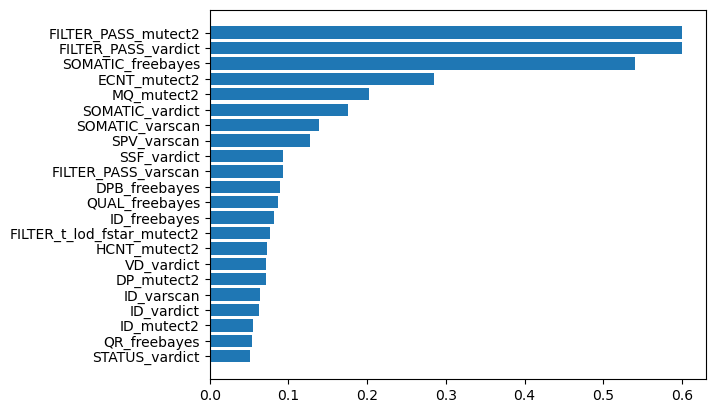

In [129]:
plt.barh(features,mean_impts)

## One iteration of train and test

In [61]:
model = XGBClassifier(eval_metric='logloss')

In [63]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [64]:
y_pred = model.predict(X_test)

<AxesSubplot: >

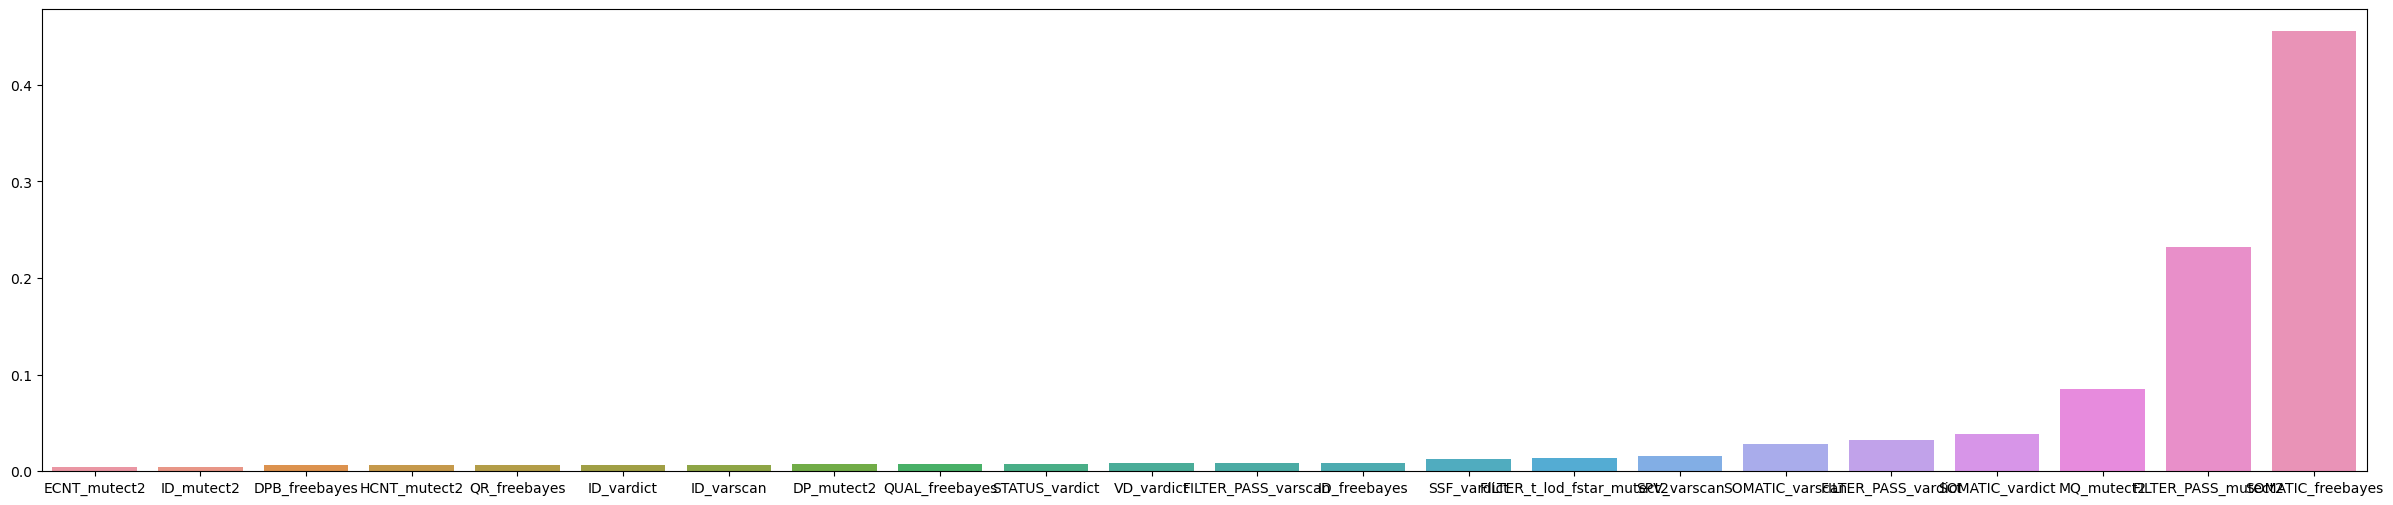

In [72]:
# calculate feature importances
dataset = 'syn4'

sorted_idx = model.feature_importances_.argsort()

fig,ax=plt.subplots(figsize=(30,6))
sns.barplot(x=X.columns[sorted_idx[4:]], y=model.feature_importances_[sorted_idx[4:]], orient='v')
#plt.savefig(f'importances_126_test40_{dataset}.png')

In [67]:
# evaluate model performance for real1 dataset with 22 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9130434782608695
Recall score: 0.88
F1 score: 0.8962172647914646
[[1861843      44]
 [     63     462]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1861887
         1.0       0.91      0.88      0.90       525

    accuracy                           1.00   1862412
   macro avg       0.96      0.94      0.95   1862412
weighted avg       1.00      1.00      1.00   1862412



In [75]:
# evaluate model performance for syn5 dataset with 126 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9978511212738994
Recall score: 0.9985113304295088
F1 score: 0.9981811166841207
[[1618312      39]
 [     27   18110]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1618351
         1.0       1.00      1.00      1.00     18137

    accuracy                           1.00   1636488
   macro avg       1.00      1.00      1.00   1636488
weighted avg       1.00      1.00      1.00   1636488



In [61]:
# evaluate model performance for syn2 dataset with 126 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9903737259343148
Recall score: 0.9825842696629213
F1 score: 0.9864636209813874
[[1923731      17]
 [     31    1749]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1923748
         1.0       0.99      0.98      0.99      1780

    accuracy                           1.00   1925528
   macro avg       1.00      0.99      0.99   1925528
weighted avg       1.00      1.00      1.00   1925528



In [49]:
# evaluate model performance for syn3 dataset with 126 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9838454228698131
Recall score: 0.970625
F1 score: 0.9771904986628912
[[1861011      51]
 [     94    3106]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1861062
         1.0       0.98      0.97      0.98      3200

    accuracy                           1.00   1864262
   macro avg       0.99      0.99      0.99   1864262
weighted avg       1.00      1.00      1.00   1864262



In [31]:
# evaluate model performance for syn1 dataset with 126 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9809456598447425
Recall score: 0.981638418079096
F1 score: 0.9812919166960818
[[1853438      27]
 [     26    1390]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1853465
         1.0       0.98      0.98      0.98      1416

    accuracy                           1.00   1854881
   macro avg       0.99      0.99      0.99   1854881
weighted avg       1.00      1.00      1.00   1854881



In [21]:
# evaluate model performance for syn4 dataset with 126 features
print(f'Precision score: {precision_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Precision score: 0.9745159688896243
Recall score: 0.9110457920792079
F1 score: 0.9417126409210842
[[1643244     154]
 [    575    5889]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1643398
         1.0       0.97      0.91      0.94      6464

    accuracy                           1.00   1649862
   macro avg       0.99      0.96      0.97   1649862
weighted avg       1.00      1.00      1.00   1649862



In [561]:
# evaluate model performance for real1 dataset with 7 features
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

F1 score: 0.7338582677165355
[[1163606      58]
 [    111     233]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1163664
         1.0       0.80      0.68      0.73       344

    accuracy                           1.00   1164008
   macro avg       0.90      0.84      0.87   1164008
weighted avg       1.00      1.00      1.00   1164008



In [547]:
# evaluate model performance for real2-1 dataset with 7 features
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

F1 score: 1.0
[[413809      0]
 [     0    116]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    413809
         1.0       1.00      1.00      1.00       116

    accuracy                           1.00    413925
   macro avg       1.00      1.00      1.00    413925
weighted avg       1.00      1.00      1.00    413925



## Saving model

In [68]:
import pickle

filename = "rea1l_22_6040.pickle"

pickle.dump(model, open(filename, "wb"))

In [36]:
model1 = pickle.load(open('syn4_126.pickle',"rb"))

<BarContainer object of 124 artists>

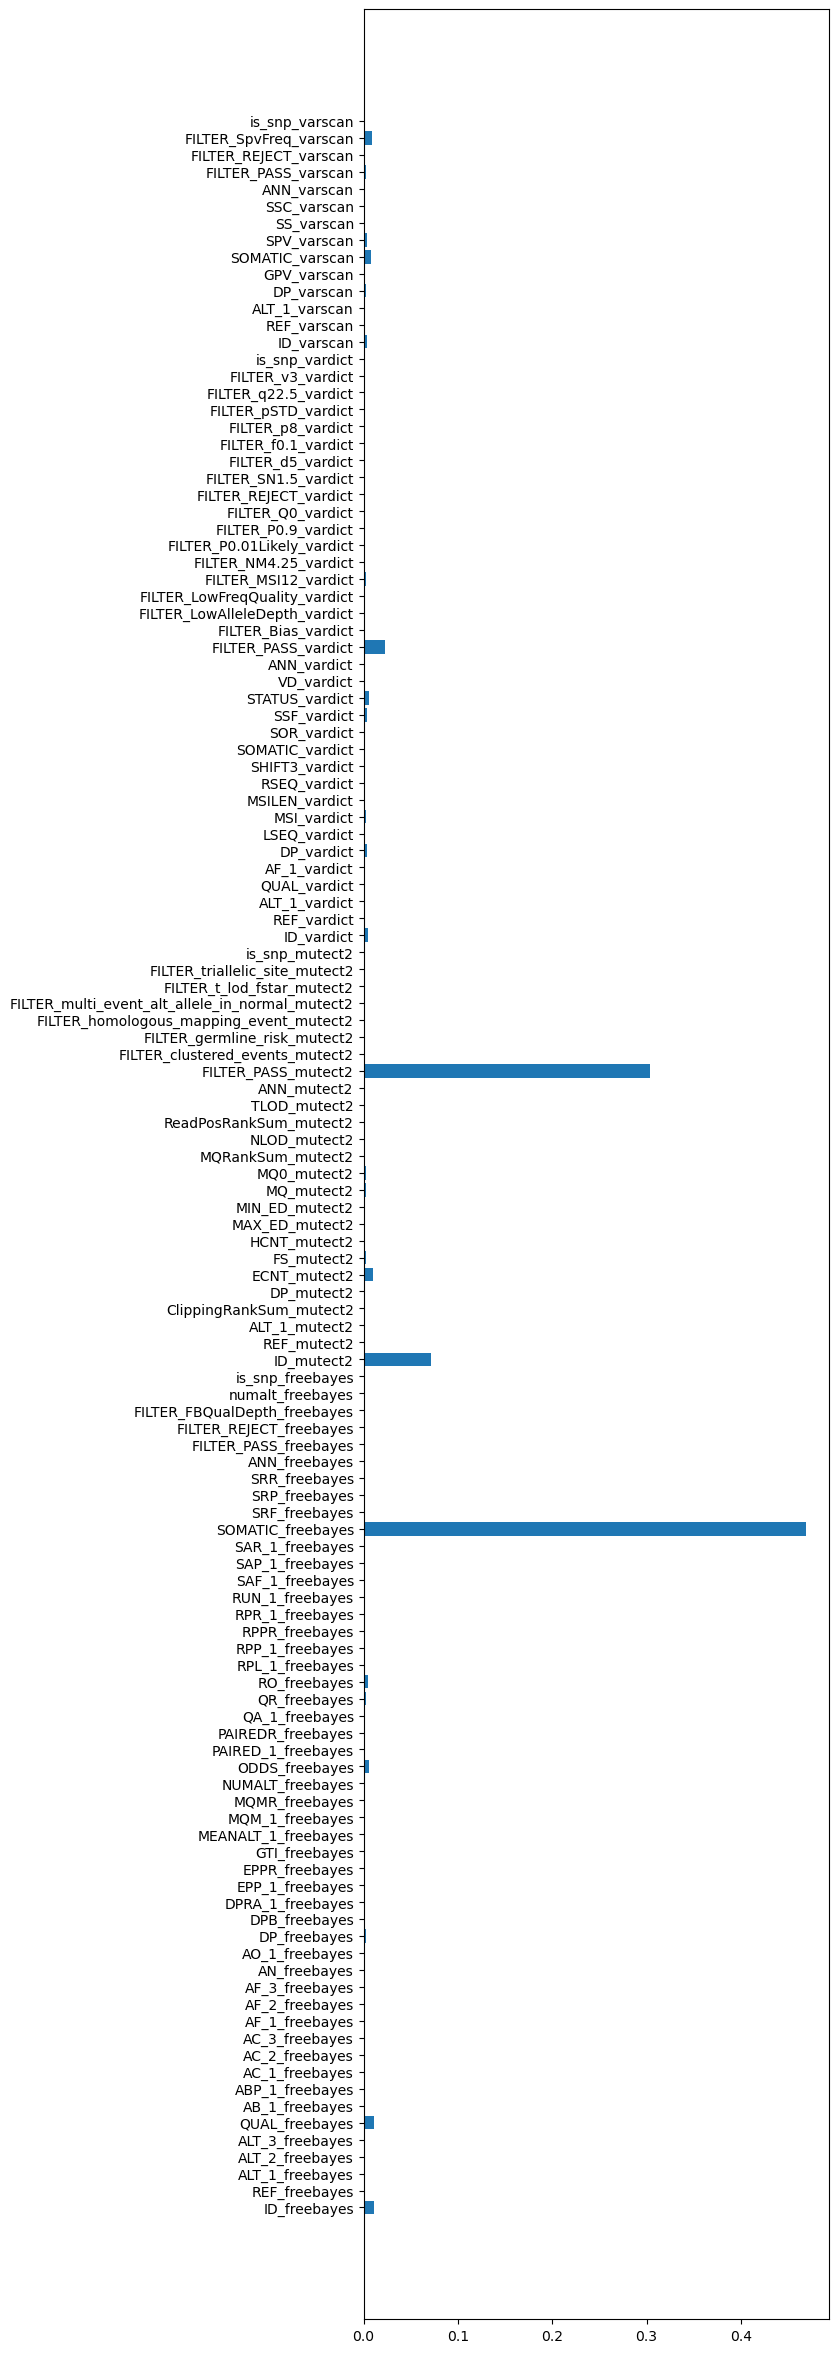

In [38]:
# calculate feature importances
dataset = 'syn5'

sorted_idx = model1.feature_importances_.argsort()

fig,ax=plt.subplots(figsize=(6,30))
ax.barh(X.columns, model.feature_importances_)
#plt.savefig(f'importances_126_test40_{dataset}.png')

### Choosing features

In [48]:
chosen_features = pd.read_csv('features_final.csv')
chosen_features = chosen_features

In [51]:
feature_dict = dict({})
counter = 0
total_counter = 0

for col in chosen_features.columns:
    for feature in chosen_features[col]:
        if feature in feature_dict.keys():
            feature_dict[feature] += 1
        else:
            feature_dict[feature] = 1
            
for feature in feature_dict.keys():
        #print(feature_dict[feature])
    if feature_dict[feature] >= 4:
        total_counter += 1
        is_in_real1 = feature in np.array(chosen_features['real1_features'])
        print(feature, is_in_real1)
        if is_in_real1:
            counter += 1
            
print(f'Total features: {total_counter}')
print(f'Features that are in real1: {counter}')

SOMATIC_freebayes True
FILTER_PASS_mutect2 True
ID_mutect2 True
FILTER_PASS_vardict True
QUAL_freebayes True
ID_freebayes True
ECNT_mutect2 False
SOMATIC_varscan True
STATUS_vardict True
ID_vardict False
ID_varscan True
SSF_vardict True
SPV_varscan True
FILTER_PASS_varscan False
QR_freebayes False
MQ_mutect2 True
VD_vardict True
FILTER_t_lod_fstar_mutect2 True
DPB_freebayes True
HCNT_mutect2 True
DP_mutect2 True
SOMATIC_vardict True
Total features: 22
Features that are in real1: 18


In [53]:
counter = 0
threshold = 3
feature_dicts = dict({'freebayes':[],'mutect2':[],'vardict':[],'varscan':[]})

for feature,counts in feature_dict.items():
    if counts > threshold and counts < 8:
        print(feature, counts)
        counter += 1
        parts = feature.split("_")
        alg = parts[-1]
        final_thing = parts[0]
        for thing in parts[1:-1]:
            final_thing = final_thing + "_" + thing
        feature_dicts[alg].append(final_thing)
        
print(counter)

SOMATIC_freebayes 6
FILTER_PASS_mutect2 6
ID_mutect2 6
FILTER_PASS_vardict 5
QUAL_freebayes 5
ID_freebayes 6
ECNT_mutect2 5
SOMATIC_varscan 6
STATUS_vardict 5
ID_vardict 5
ID_varscan 6
SSF_vardict 4
SPV_varscan 6
FILTER_PASS_varscan 4
QR_freebayes 4
MQ_mutect2 6
VD_vardict 4
FILTER_t_lod_fstar_mutect2 4
DPB_freebayes 4
HCNT_mutect2 4
DP_mutect2 5
SOMATIC_vardict 4
22


In [54]:
for f in feature_dicts:
    feature_dicts[f] += ['CHROM','POS','is_snp']
    
feature_dicts

{'freebayes': ['SOMATIC', 'QUAL', 'ID', 'QR', 'DPB', 'CHROM', 'POS', 'is_snp'],
 'mutect2': ['FILTER_PASS',
  'ID',
  'ECNT',
  'MQ',
  'FILTER_t_lod_fstar',
  'HCNT',
  'DP',
  'CHROM',
  'POS',
  'is_snp'],
 'vardict': ['FILTER_PASS',
  'STATUS',
  'ID',
  'SSF',
  'VD',
  'SOMATIC',
  'CHROM',
  'POS',
  'is_snp'],
 'varscan': ['SOMATIC', 'ID', 'SPV', 'FILTER_PASS', 'CHROM', 'POS', 'is_snp']}

In [55]:
final_target_features = {'freebayes': ['SOMATIC', 'QUAL', 'ID', 'QR', 'DPB', 'CHROM', 'POS', 'is_snp'],
 'mutect2': ['FILTER_PASS','ID','ECNT','MQ','FILTER_t_lod_fstar','HCNT','DP','CHROM','POS','is_snp',],
 'vardict': ['FILTER_PASS','STATUS','ID','SSF','VD','SOMATIC','CHROM','POS','is_snp'],
 'varscan': ['SOMATIC', 'ID', 'SPV', 'FILTER_PASS', 'CHROM', 'POS', 'is_snp']}